In [ ]:
from google.colab import files
files = files.upload()

Saving metro_student_data.csv to metro_student_data.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('metro_student_data.csv')

In [ ]:
print(df.head())
print(df.isnull().sum())

    College Start Date        College Email  Duration First Name Last Name
380   IIT D 2023-06-16    hridaan65@iitd.in 1460 days     Akarsh     Kalla
719   IIT D 2023-09-28      iramesh@iitd.in 1460 days      Kiaan    Kapoor
167   IIT D 2023-10-05      oorja34@iitd.in 1460 days     Jayant   Rastogi
515   IIT D 2023-09-29        kiyer@iitd.in 1460 days      Nirvi     Wason
715   IIT D 2022-12-11  jayantbhatt@iitd.in 1460 days        Ela      Goda
College          0
Start Date       0
College Email    0
Duration         0
First Name       0
Last Name        0
dtype: int64


In [ ]:
df = pd.read_csv('metro_student_data.csv')

In [ ]:
# Convert date columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Create a new column for the duration of the college attendance
df['Duration'] = df['End Date'] - df['Start Date']

# Extract relevant information from the 'Name' column
df['First Name'] = df['Name'].apply(lambda x: x.split()[0])
df['Last Name'] = df['Name'].apply(lambda x: x.split()[-1])

# Rename columns for clarity
df = df.rename(columns={'College Name': 'College', 'College Email ID': 'College Email'})

# Sort the DataFrame by 'College', 'First Name', 'Last Name', and 'End Date'
df = df.sort_values(by=['College', 'First Name', 'Last Name', 'End Date'])

# Reset the index of the sorted DataFrame
df = df.reset_index(drop=True)

# Save the sorted data to a new CSV file
df.to_csv('sorted_names.csv', index=False)

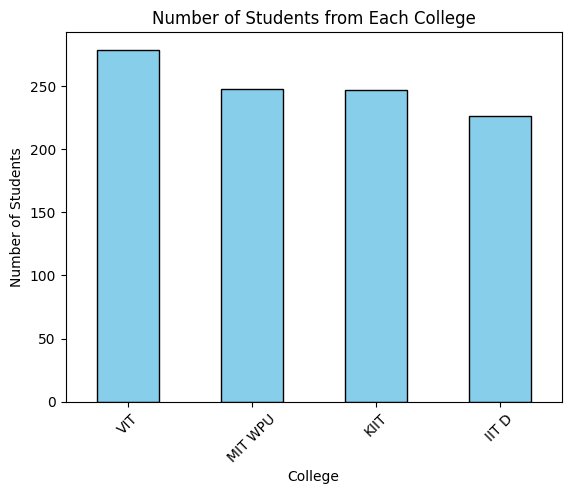

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of students from each college
college_counts = df['College'].value_counts()
college_counts.plot(kind='bar', rot=45, color='skyblue', edgecolor='black')
plt.xlabel('College')
plt.ylabel('Number of Students')
plt.title('Number of Students from Each College')
plt.show()

In [ ]:
from datetime import datetime

# Function to check student verification
def is_student_verified(start_date, end_date):
    current_date = datetime.now()
    return start_date <= current_date <= end_date

# Apply the verification function to each row
df['Verification Status'] = df.apply(lambda row: is_student_verified(row['Start Date'], row['End Date']), axis=1)

# Display the DataFrame with verification status
print(df)

# Save the DataFrame with verification status to a new CSV file
df.to_csv('verified_students.csv', index=False)

                Name College Start Date   End Date         College Email  \
0      Aaina Chauhan   IIT D 2023-03-30 2027-03-29       nakul86@iitd.in   
1       Aarav Bansal   IIT D 2023-08-31 2027-08-30  hridaandugar@iitd.in   
2    Abram Ramaswamy   IIT D 2023-02-28 2027-02-27      ujhaveri@iitd.in   
3         Advik Basu   IIT D 2023-05-01 2027-04-30    mannatlata@iitd.in   
4       Advik Bhatia   IIT D 2023-04-10 2027-04-09      eshani94@iitd.in   
..               ...     ...        ...        ...                   ...   
995       Zara Gupta     VIT 2023-07-06 2027-07-05        hiran37@vit.in   
996      Zara Saxena     VIT 2023-09-16 2027-09-15       vshankar@vit.in   
997  Zeeshan Sridhar     VIT 2023-08-24 2027-08-23       saanvi68@vit.in   
998     Zoya Chhabra     VIT 2023-02-23 2027-02-22  sehgaldarshit@vit.in   
999       Zoya Madan     VIT 2023-11-08 2027-11-07  bhardwajkrish@vit.in   

     Duration First Name  Last Name  Verification Status  
0   1460 days      Aaina    

In [ ]:
pip install qrcode[pil]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import os
import qrcode

# Load the DataFrame with verification status
df = pd.read_csv('verified_students.csv')

# Ensure the 'qr_codes' directory exists
os.makedirs('qr_codes', exist_ok=True)

# Function to generate QR code for each verified student
def generate_qr_code(student_id, verification_status):
    message = f"Student {student_id} is {'verified' if verification_status else 'not verified'} and is eligible for 30% Metro Discount."
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(message)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")

    # Save the QR code image in the 'qr_codes' directory
    img.save(f'qr_codes/student_{student_id}_qr_code.png')

# Generate QR codes for verified students
for student_id, verification_status in enumerate(df['Verification Status']):
    generate_qr_code(student_id, verification_status)

# Display the DataFrame with verification status and paths to generated QR codes
print(df)

                Name College  Start Date    End Date         College Email  \
0      Aaina Chauhan   IIT D  2023-03-30  2027-03-29       nakul86@iitd.in   
1       Aarav Bansal   IIT D  2023-08-31  2027-08-30  hridaandugar@iitd.in   
2    Abram Ramaswamy   IIT D  2023-02-28  2027-02-27      ujhaveri@iitd.in   
3         Advik Basu   IIT D  2023-05-01  2027-04-30    mannatlata@iitd.in   
4       Advik Bhatia   IIT D  2023-04-10  2027-04-09      eshani94@iitd.in   
..               ...     ...         ...         ...                   ...   
995       Zara Gupta     VIT  2023-07-06  2027-07-05        hiran37@vit.in   
996      Zara Saxena     VIT  2023-09-16  2027-09-15       vshankar@vit.in   
997  Zeeshan Sridhar     VIT  2023-08-24  2027-08-23       saanvi68@vit.in   
998     Zoya Chhabra     VIT  2023-02-23  2027-02-22  sehgaldarshit@vit.in   
999       Zoya Madan     VIT  2023-11-08  2027-11-07  bhardwajkrish@vit.in   

      Duration First Name  Last Name  Verification Status  
0  

In [ ]:
from zipfile import ZipFile

# Save the DataFrame with verification status to 'verified_students.csv'
df.to_csv('verified_students.csv', index=False)

# Create a ZIP file containing 'verified_students.csv' and 'qr_codes' directory
with ZipFile('download_files.zip', 'w') as zipf:
    zipf.write('verified_students.csv')
    for root, dirs, files in os.walk('qr_codes'):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=os.path.join('qr_codes', file))

print("Download files: download_files.zip")

Download files: download_files.zip


In [ ]:
# Mount Google Drive to Colab (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Move the created ZIP file to Google Drive
!mv download_files.zip '/content/drive/MyDrive/'

# Provide a link to download the ZIP file
download_link = '/content/drive/MyDrive/download_files.zip'
print(f"Download the ZIP file from this link: {download_link}")

Mounted at /content/drive
Download the ZIP file from this link: /content/drive/MyDrive/download_files.zip
